# 1. Predicción de un valor numérico continuo (Regresión)

## Enunciado: 
Utilizando datos históricos de precios de viviendas en función de sus características\
(metros cuadrados, número de habitaciones, ubicación, etc.), construye un modelo de regresión lineal\
para predecir el precio de nuevas viviendas.  
Explora y visualiza los datos para entender las relaciones entre las variables.  
Realiza una limpieza de datos para manejar valores faltantes o atípicos, y evalúa  
el rendimiento de tu modelo utilizando métricas adecuadas.  

### Dataset: 
[Conjunto de datos de precios de viviendas de California](https://www.google.com/url?sa=E&source=gmail&q=https://www.kaggle.com/datasets/camnugent/california-housing-prices)

# RESOLUCION

### Carga de datos y visualizacion.

In [89]:
#Cargar las librerias:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
#Cargar el csv de los datos:
data = pd.read_csv('datasets/1-housing.csv')

In [57]:
#Mostramos los primeros 5 registros:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [58]:
#Vemos la informacion estadistica:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### EDA (Acomodamos los datos)

In [126]:
#Comprovamos el tipo de datos, y si hay nulos:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [127]:
#Al verificar que hay nulos en la columna "total_bedrooms", procedemos a mostrarles.
#Mostramos las filas con nulos:
filas_con_nulos = data[data.isnull().any(axis=1)]
print(filas_con_nulos)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  media

In [128]:
# Tambien podemos contar contar los nulos en el dataframe:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [129]:
#Nos aparecen 207 filas con nulos.
#Creamos una copia del dataframe para trabajar con el:
data_procesado = data.copy()

In [130]:
#Eliminamos las filas con nulos del dataframe nuevo:
data_limpio = data_procesado.dropna(inplace=True)

In [131]:
# Verificamos que ya no hay nulos en el dataframe nuevo:
print(data_procesado.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [132]:
#Cambiar los valores de la columna "ocean_proximity" a valores numericos:
data_procesado['ocean_proximity'] = data_procesado['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN': 4, 'ISLAND': 5})


## Creamos el particionado

In [133]:
##Original
#X_train, X_test, y_train, y_test = train_test_split(data_procesado['longitude', 'latitude', 'housing_median_age',
#                                                            'total_rooms', 'total_bedrooms', 'population', 'households',
#                                                            'median_income'], data_procesado['median_house_value'], random_state=20)
# Select features for prediction (excluding target variable and non-numerical columns)
X = data_procesado[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = data_procesado['median_house_value']

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

## Creaccion del Particionado

In [134]:
#lr = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
lr = LinearRegression().fit(X_train, y_train)

In [135]:
#Prediccion
#y_pred = lr.predict(X_test.values.reshape())
y_pred = lr.predict(X_test)

### Representacion grafica

In [156]:
from sklearn.linear_model import LogisticRegression


X = np.array(data_procesado.drop(['median_house_value'],axis=1))
y = np.array(data_procesado['longitude'])
X.shape
log_reg = LogisticRegression()
log_reg.fit(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

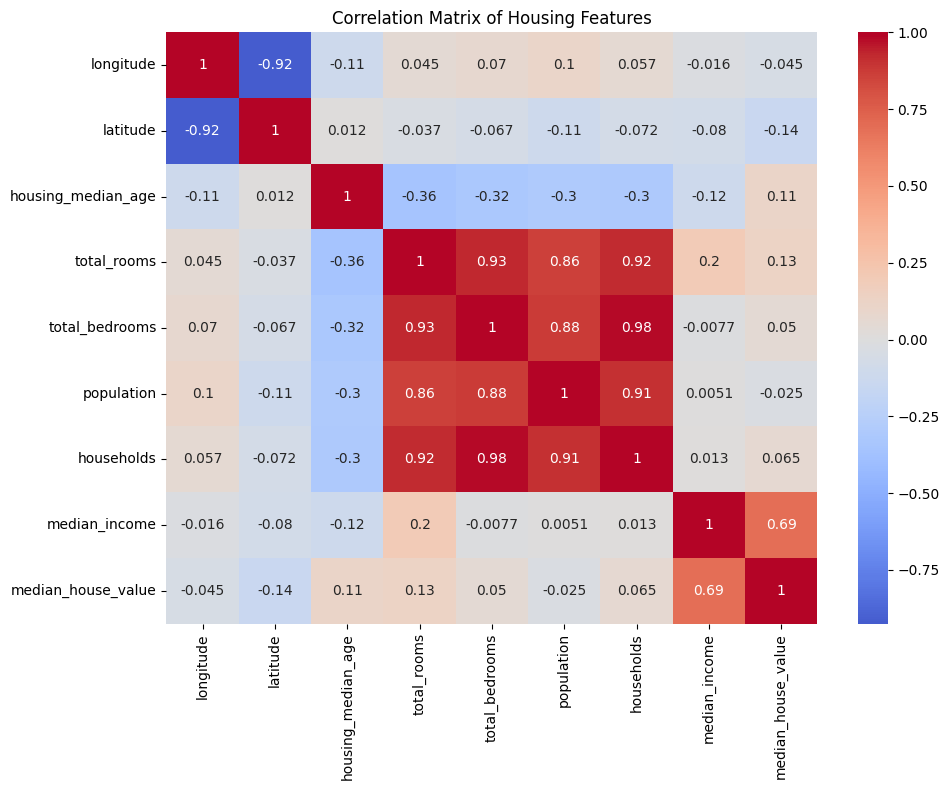

In [137]:
# Import required visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_procesado.drop('ocean_proximity', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()

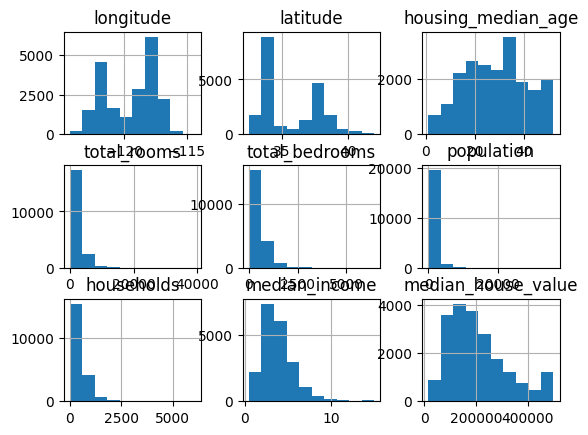

In [143]:
data_procesado.drop(['ocean_proximity'],axis=1).hist()
plt.ion()

## Visualizacion de coeficientes

In [ ]:
# Visualización de coeficientes mínimos cuadrados W1 y W0

print("Coeficiente w1:", lr.coef_)
print("Coeficiente w0:", lr.intercept_)

Coeficiente w1: [-4.33896374e+04 -4.30734511e+04  1.19017808e+03 -9.21536477e+00
  1.21625450e+02 -3.71134644e+01  4.21039127e+01  4.06139029e+04]
Coeficiente w0: -3646372.5424935343


In [154]:
# Error cuadrático medio - MSE

print("MSE: ",mean_squared_error(y_test, y_pred))

MSE:  4711311532.368852


In [153]:
# Coeficientes de determinación (R2)

#print("Valor del coeficiente de determinación del conjunto de entrenamiento:", round (lr.score(X_train.values.reshape(-1, 1), y_train), 3))
#print("Valor del coeficiente de determinación del conjunto de prueba:", round (lr.score(X_test.values.reshape(-1, 1), y_test), 3))


print("Valor del coeficiente de determinación del conjunto de entrenamiento:", round(lr.score(X_train, y_train), 3))
print("Valor del coeficiente de determinación del conjunto de prueba:", round(lr.score(X_test, y_test), 3))

Valor del coeficiente de determinación del conjunto de entrenamiento: 0.638
Valor del coeficiente de determinación del conjunto de prueba: 0.634


## Graficado

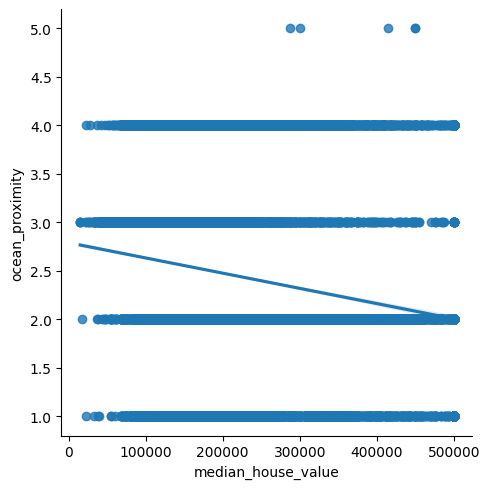

In [160]:
#Ploteado de la gráfica de regresión lineal simple

import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de regresión lineal usando seaborn
sns.lmplot(x='median_house_value', y='ocean_proximity', data=data_procesado)
# Mostrar gráfico
plt.show()